In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
data = pd.read_csv("exams.csv")
data.head


<bound method NDFrame.head of      gender race/ethnicity parental_level_of_education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation_course  math_score  reading_score  writing_score  
0                 completed      

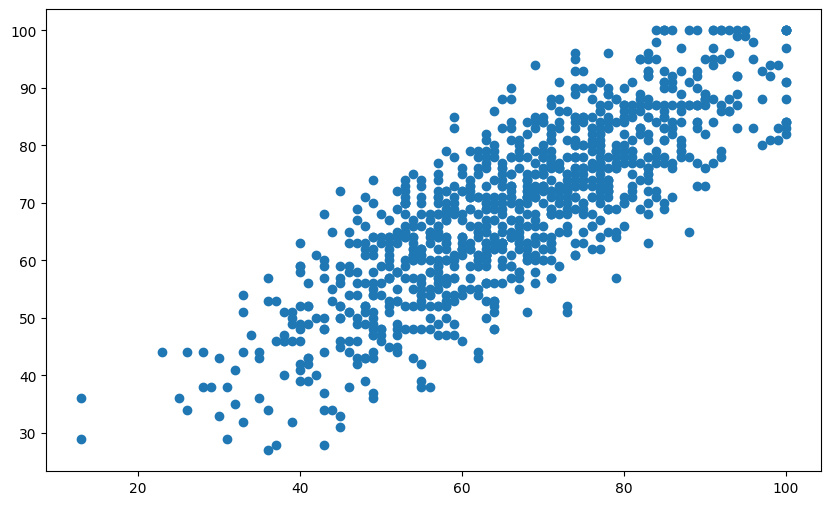

In [16]:
x = data.math_score
x = np.array(x)
y = data.reading_score
y = np.array(y)

plt.figure(figsize=(10,6))
plt.scatter(x,y)

In [17]:
Lr = 0.000001

def model(a, b, x):
    return a*x + b

def loss_function(a, b, x, y):
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()

def optimize(a,b,x,y):
    num = len(x)
    prediction = model(a,b,x)
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())
    a = a - Lr*da
    b = b - Lr*db
    return a, b

def iterate(a,b,x,y,times):
    for i in range(times):
        a,b = optimize(a,b,x,y)
    return a,b

[0.93422908]
[0.79823698]
[1.01468532] [0.80762401] 42.292718448609236


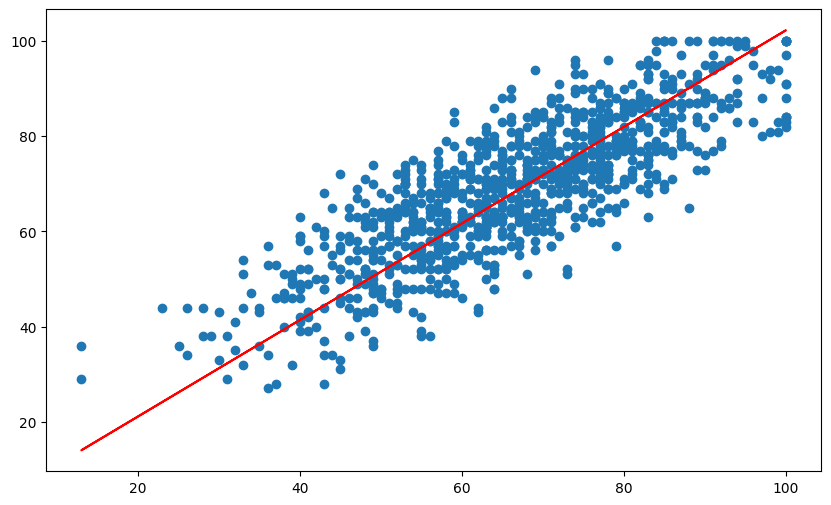

In [18]:
from turtle import color

a = np.random.rand(1)
print(a)
b = np.random.rand(1)
print(b)

a,b = iterate(a,b,x,y,10000)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,prediction, color = 'red')